# Data

Either download the  .csv file from below link or (optionally) get fresh data from running an SQL query on StackExchange:

https://data.stackexchange.com/stackoverflow/query/675441/popular-programming-languages-per-over-time-eversql-com

# Import Statements

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Downloads/QueryResults.csv', header=0, names=['DATE', 'TAG', 'POSTS'])

In [3]:
df.head()

,DATE,TAG,POSTS
0,2008-07-01 00:00:00,c#,3
1,2008-08-01 00:00:00,assembly,8
2,2008-08-01 00:00:00,c,83
3,2008-08-01 00:00:00,c#,505
4,2008-08-01 00:00:00,c++,164


In [4]:
df.tail()

,DATE,TAG,POSTS
2379,2022-11-01 00:00:00,php,3930
2380,2022-11-01 00:00:00,python,24918
2381,2022-11-01 00:00:00,r,4796
2382,2022-11-01 00:00:00,ruby,475
2383,2022-11-01 00:00:00,swift,1829


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2384 entries, 0 to 2383
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   DATE    2384 non-null   object
 1   TAG     2384 non-null   object
 2   POSTS   2384 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 56.0+ KB


In [6]:
df.isna().sum()

DATE     0
TAG      0
POSTS    0
dtype: int64

In [7]:
print(f'Data has {df.shape[0]} rows and {df.shape[1]} columns')
print(f'Data has {df.ndim} dimensions.')

Data has 2384 rows and 3 columns
Data has 2 dimensions.


In [8]:
print(f"{df[['DATE']].count()} \n")
print(f"{df[['TAG']].count()} \n")
print(f"{df[['POSTS']].count()} \n")

DATE    2384
dtype: int64 

TAG    2384
dtype: int64 

POSTS    2384
dtype: int64 



In [9]:
df.groupby('TAG').sum()

,POSTS
TAG,
assembly,41665
c,389478
c#,1569899
c++,782589
delphi,50333
go,65983
java,1876071
javascript,2450181
perl,67307


In [10]:
df.groupby('TAG').count()

,DATE,POSTS
TAG,,
assembly,172,172
c,172,172
c#,173,173
c++,172,172
delphi,172,172
go,157,157
java,172,172
javascript,172,172
perl,172,172


# Data Cleaning

Let's fix the date format to make it more readable. We need to use Pandas to change format from a string of "2008-07-01 00:00:00" to a datetime object with the format of "2008-07-01"

In [11]:
print(df['DATE'][1])
print(type(df['DATE'][1]))

2008-08-01 00:00:00
<class 'str'>


In [12]:
print(pd.to_datetime(df['DATE'][1]))
type(pd.to_datetime(df['DATE'][1]))

2008-08-01 00:00:00


pandas._libs.tslibs.timestamps.Timestamp

In [13]:
# Converting entire col to date time from string
df['DATE'] = pd.to_datetime(df['DATE'])

In [14]:
df.head()

,DATE,TAG,POSTS
0,2008-07-01,c#,3
1,2008-08-01,assembly,8
2,2008-08-01,c,83
3,2008-08-01,c#,505
4,2008-08-01,c++,164


# Data Manipulation

In [15]:
reshaped_df = df.pivot(columns='TAG', index='DATE', values='POSTS')

In [16]:
reshaped_df.shape

(173, 14)

In [17]:
print(reshaped_df.head())
print(reshaped_df.tail())
print(reshaped_df.columns)

TAG         assembly      c      c#    c++  delphi  go    java  javascript  \
DATE                                                                         
2008-07-01       NaN    NaN     3.0    NaN     NaN NaN     NaN         NaN   
2008-08-01       8.0   83.0   505.0  164.0    14.0 NaN   222.0       163.0   
2008-09-01      28.0  318.0  1645.0  753.0   104.0 NaN  1131.0       635.0   
2008-10-01      15.0  303.0  1988.0  808.0   112.0 NaN  1149.0       724.0   
2008-11-01      17.0  259.0  1731.0  734.0   141.0 NaN   957.0       581.0   

TAG          perl    php  python    r   ruby  swift  
DATE                                                 
2008-07-01    NaN    NaN     NaN  NaN    NaN    NaN  
2008-08-01   28.0  158.0   120.0  NaN   70.0    NaN  
2008-09-01  130.0  476.0   537.0  6.0  287.0    NaN  
2008-10-01  127.0  612.0   508.0  NaN  247.0    NaN  
2008-11-01   97.0  501.0   451.0  1.0  158.0    NaN  
TAG         assembly       c      c#     c++  delphi     go    java  \
DATE

In [18]:
reshaped_df

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-08-01,8.0,83.0,505.0,164.0,14.0,NaN,222.0,163.0,28.0,158.0,120.0,NaN,70.0,NaN
2008-09-01,28.0,318.0,1645.0,753.0,104.0,NaN,1131.0,635.0,130.0,476.0,537.0,6.0,287.0,NaN
2008-10-01,15.0,303.0,1988.0,808.0,112.0,NaN,1149.0,724.0,127.0,612.0,508.0,NaN,247.0,NaN
2008-11-01,17.0,259.0,1731.0,734.0,141.0,NaN,957.0,581.0,97.0,501.0,451.0,1.0,158.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-01,210.0,1492.0,5963.0,3264.0,127.0,745.0,6616.0,15178.0,130.0,3775.0,22474.0,4193.0,452.0,1754.0
2022-08-01,178.0,1509.0,6345.0,3247.0,133.0,859.0,6541.0,15612.0,119.0,3782.0,21976.0,4345.0,476.0,1744.0
2022-09-01,191.0,1660.0,5769.0,3107.0,148.0,845.0,6307.0,14384.0,82.0,3413.0,20322.0,4026.0,477.0,1814.0


In [19]:
reshaped_df.count()

TAG
assembly      172
c             172
c#            173
c++           172
delphi        172
go            157
java          172
javascript    172
perl          172
php           172
python        172
r             170
ruby          172
swift         164
dtype: int64

In [20]:
reshaped_df.fillna(0, inplace=True)

In [21]:
reshaped_df

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2008-08-01,8.0,83.0,505.0,164.0,14.0,0.0,222.0,163.0,28.0,158.0,120.0,0.0,70.0,0.0
2008-09-01,28.0,318.0,1645.0,753.0,104.0,0.0,1131.0,635.0,130.0,476.0,537.0,6.0,287.0,0.0
2008-10-01,15.0,303.0,1988.0,808.0,112.0,0.0,1149.0,724.0,127.0,612.0,508.0,0.0,247.0,0.0
2008-11-01,17.0,259.0,1731.0,734.0,141.0,0.0,957.0,581.0,97.0,501.0,451.0,1.0,158.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-01,210.0,1492.0,5963.0,3264.0,127.0,745.0,6616.0,15178.0,130.0,3775.0,22474.0,4193.0,452.0,1754.0
2022-08-01,178.0,1509.0,6345.0,3247.0,133.0,859.0,6541.0,15612.0,119.0,3782.0,21976.0,4345.0,476.0,1744.0
2022-09-01,191.0,1660.0,5769.0,3107.0,148.0,845.0,6307.0,14384.0,82.0,3413.0,20322.0,4026.0,477.0,1814.0


In [22]:
reshaped_df.count()

TAG
assembly      173
c             173
c#            173
c++           173
delphi        173
go            173
java          173
javascript    173
perl          173
php           173
python        173
r             173
ruby          173
swift         173
dtype: int64

# Data Visualization with Matplotlib

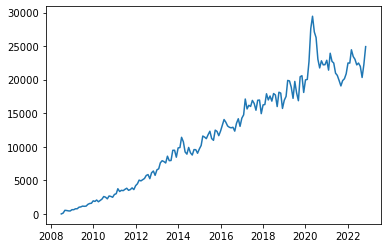

In [23]:
plt.plot(reshaped_df.index, reshaped_df['python'])

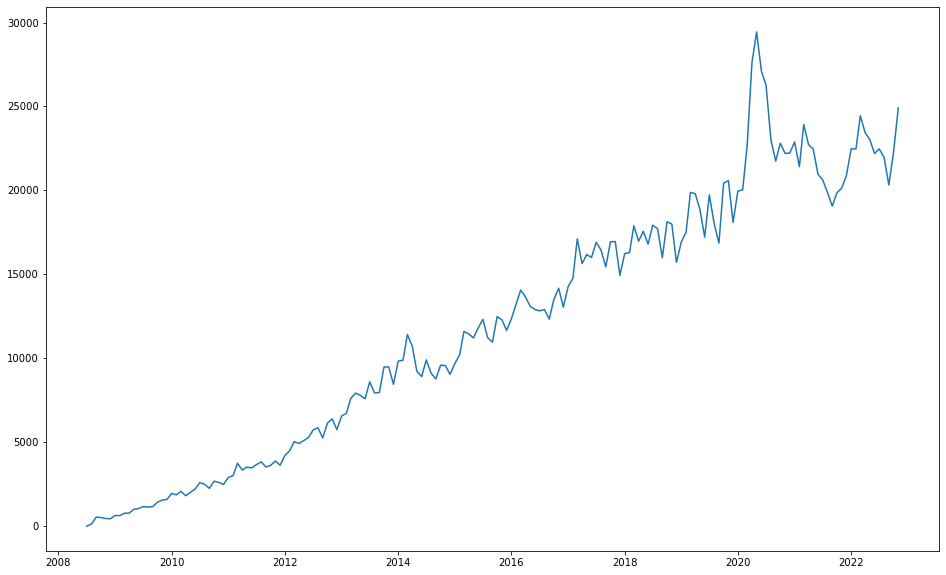

In [24]:
plt.figure(figsize=(16, 10))
plt.plot(reshaped_df.index, reshaped_df.python)

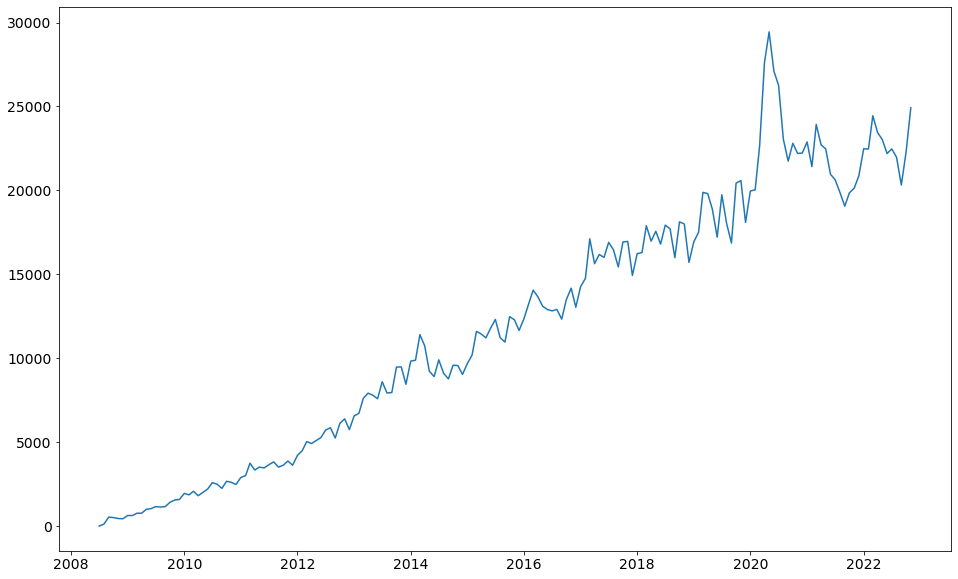

In [25]:
plt.figure(figsize=(16, 10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.plot(reshaped_df.index, reshaped_df['python'])

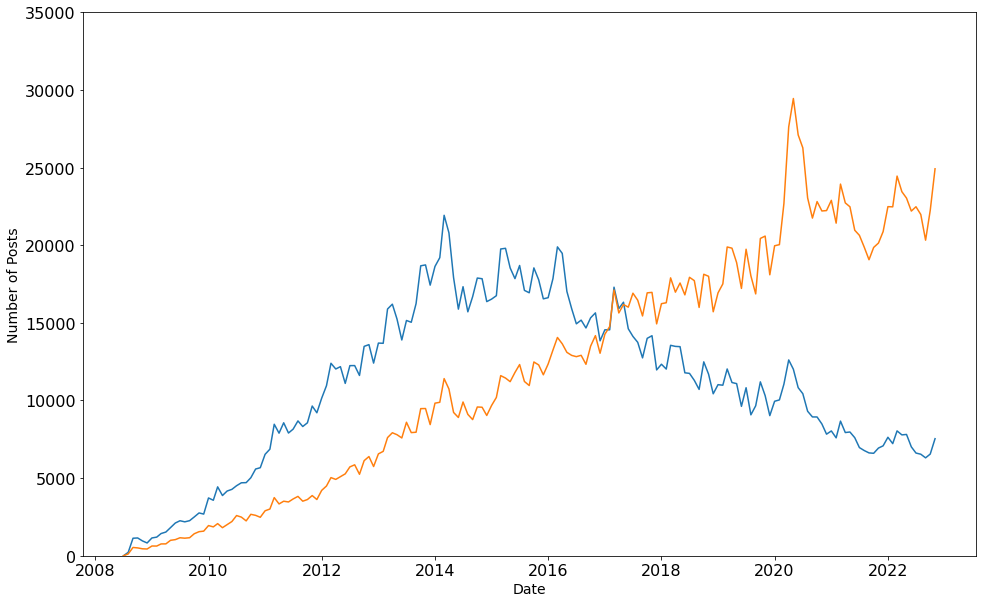

In [26]:
plt.figure(figsize=(16, 10))
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)
plt.plot(reshaped_df.index, reshaped_df['java'])
plt.plot(reshaped_df.index, reshaped_df['python'])

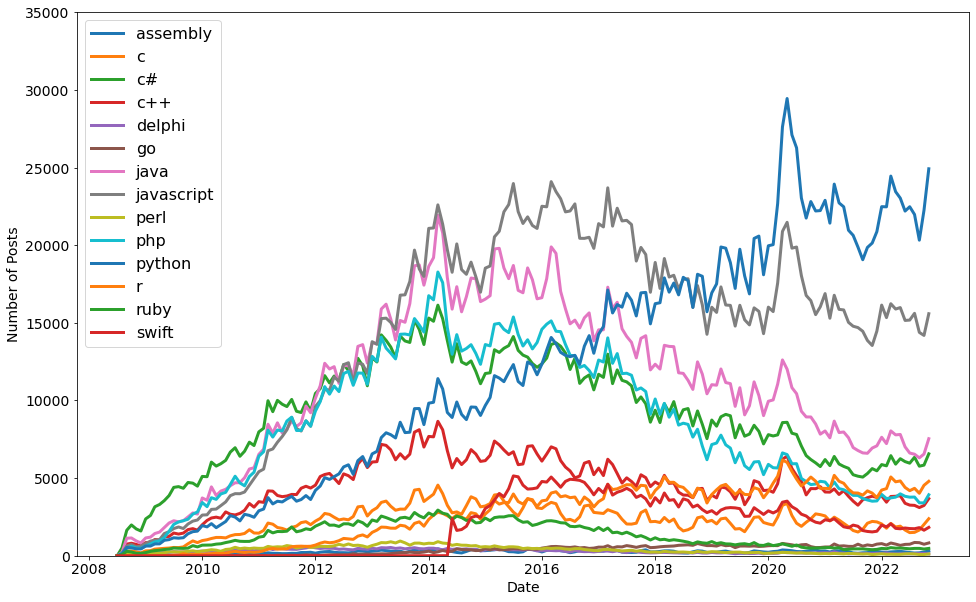

In [27]:
plt.figure(figsize=(16, 10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)

for column in reshaped_df.columns:
  plt.plot(reshaped_df.index, reshaped_df[column], linewidth=3, label=reshaped_df[column].name)

plt.legend(fontsize=16)

# Time Series Data
Time series data can be quite noisy, with a lot of up and down spikes. To better see a trend we can plot an average of, say 6 or 12 observations. This is called the rolling mean. We calculate the average in a window of time and move it forward by one overservation. Pandas has two handy methods already built in to work this out: rolling() and mean().

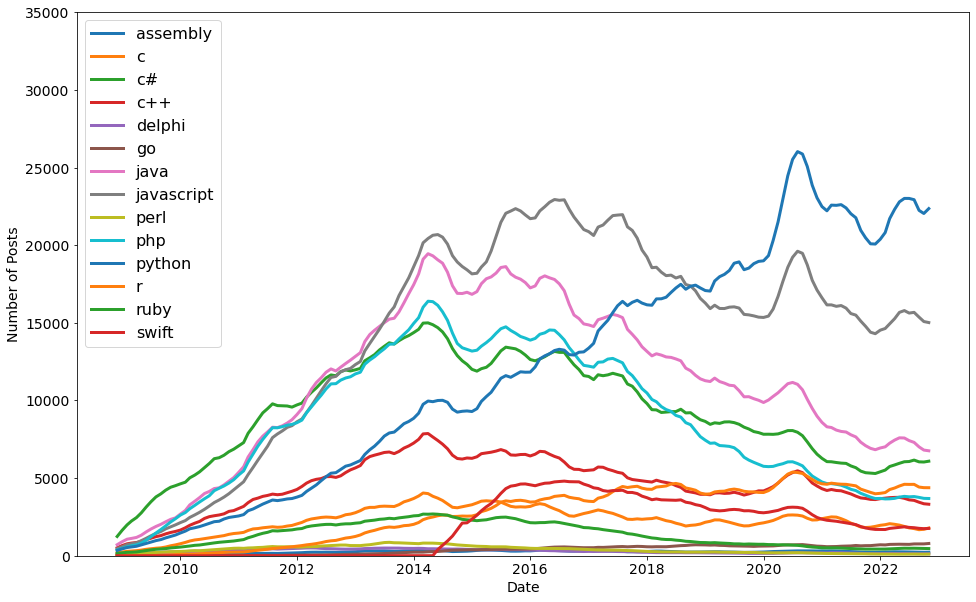

In [28]:
rool_df = reshaped_df.rolling(window=6).mean()
plt.figure(figsize=(16, 10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)

for column in rool_df.columns:
  plt.plot(rool_df.index, rool_df[column], linewidth=3, label=rool_df[column].name)


plt.legend(fontsize=16)

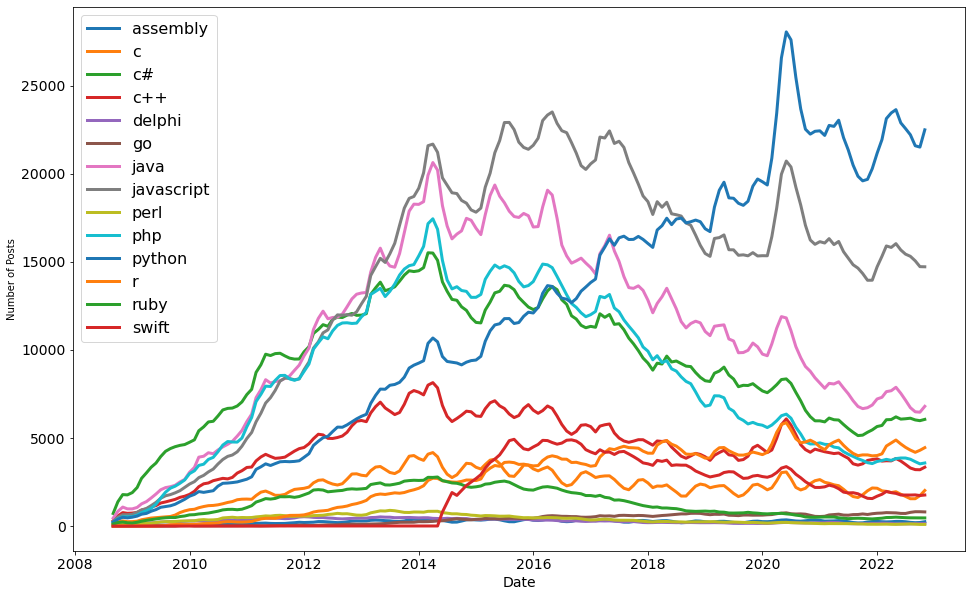

In [29]:
rool_df = reshaped_df.rolling(window=3).mean()

plt.figure(figsize=(16, 10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts')

for column in rool_df.columns:
  plt.plot(rool_df.index, rool_df[column], linewidth=3, label=rool_df[column].name)

plt.legend(fontsize=16)

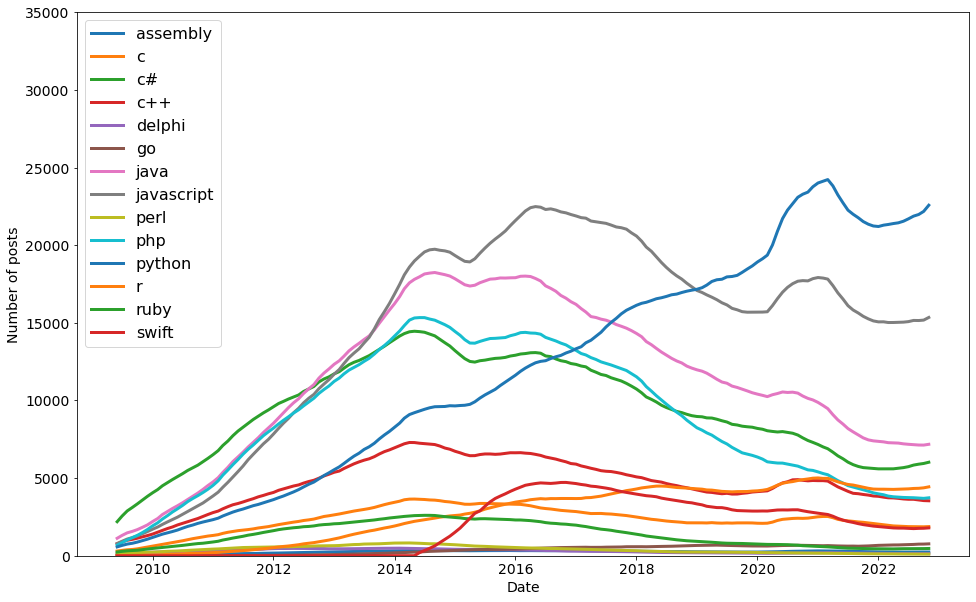

In [30]:
rool_df = reshaped_df.rolling(window=12).mean()

plt.figure(figsize=(16, 10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of posts', fontsize=14)
plt.ylim(0, 35000)

for column in rool_df.columns:
  plt.plot(rool_df.index, rool_df[column], linewidth=3, label=rool_df[column].name)

plt.legend(fontsize=16)

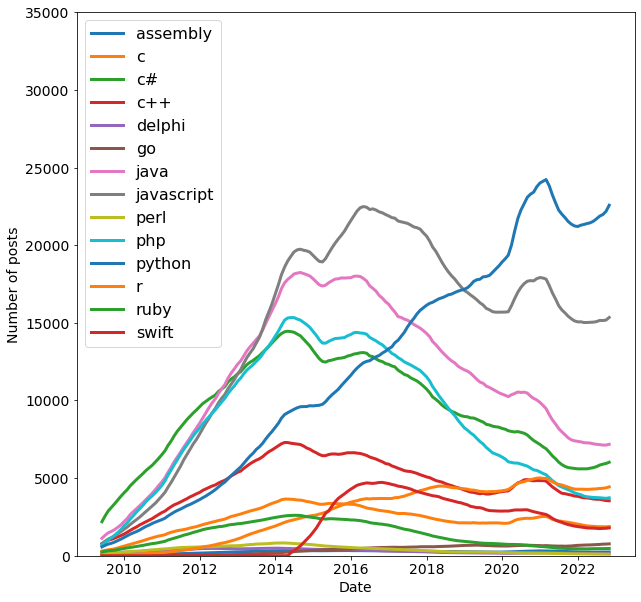

In [31]:
rool_df = reshaped_df.rolling(window=12).mean()

plt.figure(figsize=(10, 10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of posts', fontsize=14)
plt.ylim(0, 35000)

for column in rool_df.columns:
  plt.plot(rool_df.index, rool_df[column], linewidth=3, label=rool_df[column].name)

plt.legend(fontsize=16)